## Wstęp do multimediów (WMM)
## Laboratorium #1: Analiza częstotliwościowa sygnałów czasu dyskretnego
Grupa 103, 13 marca 2025 r., godz. 14.15  
Kacper Górski  
Jakub Bagiński

# Zadanie 1

1. Liczba próbek (w jednym okresie) sygnału rzeczywistego 𝑠(𝑡) = 𝑠𝑖𝑛(𝜋𝑡) wynosi 𝑁, gdzie N jest potęgą 2.
-  Przyjmując N = 8 wykreślić przebieg sygnału spróbkowanego, widmo amplitudowe i fazowe oraz
zweryfikować eksperymentalnie słuszność twierdzenia Parsevala.
-  Wykreślić wykres przedstawiający czas wyznaczania widma sygnału dyskretnego za pomocą
algorytmu FFT w funkcji liczby próbek 𝑁 = 2^𝑙, 𝑙 ∈ ℕ. Skomentować kształt otrzymanego wykresu
odnosząc się do teoretycznej złożoności obliczeniowej algorytmu FFT

In [10]:
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq
import numpy as np
import time


Przyjmując N = 8 wykreślić przebieg sygnału spróbkowanego, widmo amplitudowe i fazowe oraz
zweryfikować eksperymentalnie słuszność twierdzenia Parsevala.

Parseval
left:  4.0
right:  4.0
Parseval proven?  True


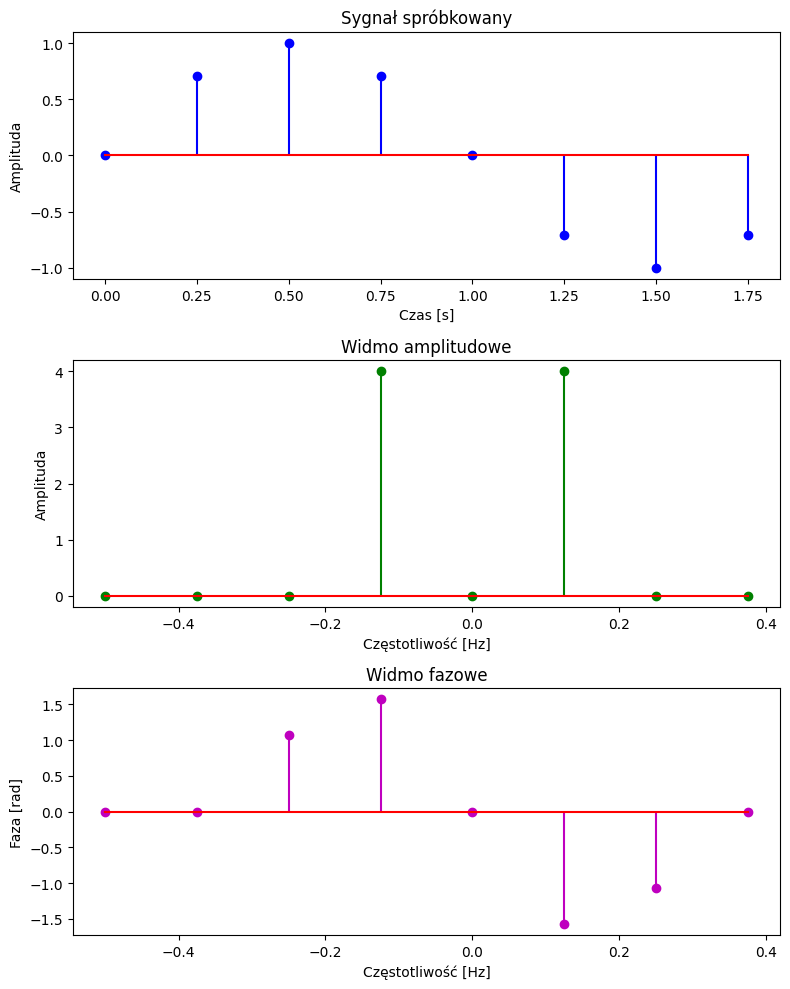

In [ ]:
N = 8                                       # liczba próbek
t = np.linspace(0.0, 2, N, endpoint=False)  # czas próbkowania, liczba próbek N
signal = np.sin(np.pi * t)                  # sygnał s(t) = sin(πt)

def calc_spectrum(signal):
    return fft(signal)

def calc_amplitude_spectrum(signal):
    return np.abs(calc_spectrum(signal))

def calc_phase_spectrum(signal):
    angles = np.angle(calc_spectrum(signal))

    zero_angles = abs(angles) < 0.01
    angles *= ~zero_angles

    return angles

# print('Widmo amplitudowe:')
# print(calc_amplitude_spectrum(signal))
# print('Widmo fazowe:')
# print(calc_phase_spectrum(signal))

def calc_parseval_left(signal):
    return np.sum(np.abs(signal) ** 2)

def calc_parseval_right(spectrum):
    return np.sum(np.abs(spectrum) ** 2) / N

def calc_freq_power(signal):
    spectrum = calc_spectrum(signal)
    return (1/N**2) * np.sum(np.abs(spectrum) ** 2)

def prove_parseval(signal):
    spectrum = calc_spectrum(signal)
    print("Parseval")
    print("left: ", calc_parseval_left(signal))
    print("right: ", calc_parseval_right(spectrum))
    return round(calc_parseval_left(signal), 4) == round(calc_parseval_right(spectrum), 4)

print('Parseval proven? ', prove_parseval(signal))

# plot
spectrum = calc_spectrum(signal)
amplitude_spectrum = calc_amplitude_spectrum(signal)
phase_spectrum = calc_phase_spectrum(signal)
freqs = fftfreq(N)

fig, axs = plt.subplots(3, 1, figsize=(8, 10))

axs[0].stem(t, signal, linefmt='b-', markerfmt='bo', basefmt="r-")
axs[0].set_title("Sygnał spróbkowany")
axs[0].set_xlabel("Czas [s]")
axs[0].set_ylabel("Amplituda")

axs[1].stem(freqs, amplitude_spectrum, linefmt='g-', markerfmt='go', basefmt="r-")
axs[1].set_title("Widmo amplitudowe")
axs[1].set_xlabel("Częstotliwość [Hz]")
axs[1].set_ylabel("Amplituda")

axs[2].stem(freqs, phase_spectrum, linefmt='m-', markerfmt='mo', basefmt="r-")
axs[2].set_title("Widmo fazowe")
axs[2].set_xlabel("Częstotliwość [Hz]")
axs[2].set_ylabel("Faza [rad]")

plt.tight_layout()
plt.show()

**Wniosek:** Wyniki potwierdzają słuszność twierdzenia Parsevala.

Wykreślić wykres przedstawiający czas wyznaczania widma sygnału dyskretnego za pomocą
algorytmu FFT w funkcji liczby próbek 𝑁 = 2^𝑙, 𝑙 ∈ ℕ. Skomentować kształt otrzymanego wykresu
odnosząc się do teoretycznej złożoności obliczeniowej algorytmu FFT

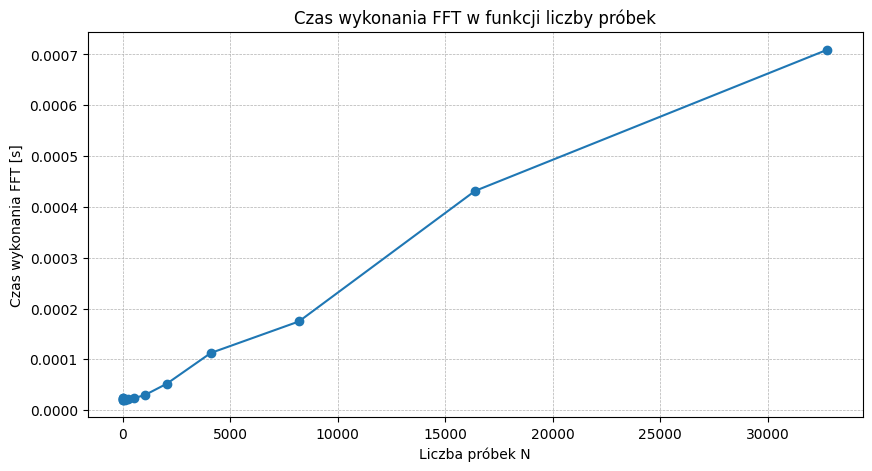

In [12]:
iter = 1000
l = np.arange(1, 16)
N_l = 2 ** l
exec_times = []

for n in N_l:
    mean_time = 0
    for _ in range(iter):
        signal = np.random.rand(n)

        start = time.perf_counter()
        fft(signal)
        stop = time.perf_counter()

        mean_time += (stop - start)
    exec_times.append(mean_time / iter)

plt.figure(figsize=(10, 5))
plt.plot(N_l, exec_times, marker='o', linestyle='-')
plt.xlabel("Liczba próbek N")
plt.ylabel("Czas wykonania FFT [s]")
plt.title("Czas wykonania FFT w funkcji liczby próbek")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

**Wniosek:** Wykres ma kształt zbliżony do liniowego, jednak zauważalna jest tendencja do wzrostu szybszego niż liniowy. Stąd można założyć, że kształt wykresu asymptotycznie opisuje krzywa N * log N, co potwierdza teoretyczną złożoność obliczeniową algorytmu. Czynnik log N będzie wraz ze wzrostem N miał coraz mniejsze znaczenie, dlatego dla dużych N kształt przypomina linię prostą.

# Zadanie 2

Zbadać wpływ przesunięcia w czasie na postać widma amplitudowego i widma fazowego dyskretnego
sygnału harmonicznego 𝑠[𝑛] = 𝐴 𝑠𝑖𝑛 (2𝜋𝑛 / 𝑁) o amplitudzie 𝐴 = 4 i okresie podstawowym 𝑁 = 52.
W tym celu dla każdej wartości 𝑛0 ∈ {0, 𝑁/4, 𝑁/2, 3𝑁/4} 
wykreślić widmo amplitudowe i fazowe przesuniętego sygnału 𝑠[𝑛 − 𝑛0].
Skomentować otrzymane wyniki.

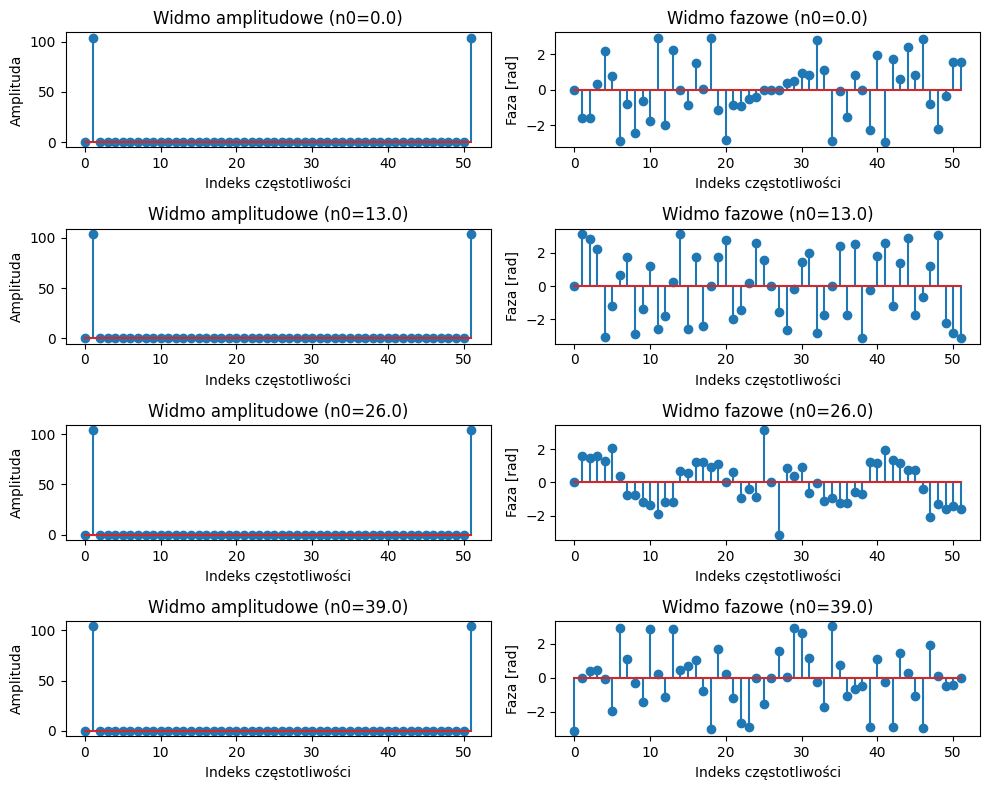

In [13]:
A = 4
N = 52.

signal = lambda n, bias=0: A * np.sin(2 * np.pi * (n - bias) / N)

n = np.arange(N)
n0_array = np.array([0, N/4, N/2, 3 * N/4])

def calc_spectrum(signal):
    return fft(signal)

def calc_amplitude_spectrum(signal):
    return np.abs(calc_spectrum(signal))


def calc_phase_spectrum(signal):
    angles = np.angle(calc_spectrum(signal))

    zero_angles = abs(angles) < 0.01
    angles *= ~zero_angles

    return angles


fig, axes = plt.subplots(len(n0_array), 2, figsize=(10, 8))

for i, n0 in enumerate(n0_array):
    shifted_signal = signal(n, bias=n0)
    amplitude_spectrum = calc_amplitude_spectrum(shifted_signal)
    phase_spectrum = calc_phase_spectrum(shifted_signal)

    axes[i, 0].stem(amplitude_spectrum)
    axes[i, 0].set_title(f"Widmo amplitudowe (n0={n0})")
    axes[i, 0].set_xlabel("Indeks częstotliwości")
    axes[i, 0].set_ylabel("Amplituda")

    axes[i, 1].stem(phase_spectrum)
    axes[i, 1].set_title(f"Widmo fazowe (n0={n0})")
    axes[i, 1].set_xlabel("Indeks częstotliwości")
    axes[i, 1].set_ylabel("Faza [rad]")

plt.tight_layout()
plt.show()

Wnioski:

Dodanie przesunięcia w czasie nie miało wpływu na przbieg widma amplitudowego, ponieważ dany punkt z widma obracamy jedynie wokół środka zespolonego układu wspołrzędnych, zatem amplituda czyli odległość tego punktu od środka się nie zmienia. Jednak znacząco zmienia kształt i przebieg widma fazowego, co widać na powyższych diagramach.

# Zadanie 3

Zbadać wpływ dopełnienia zerami na postać widma amplitudowego i widma fazowego dyskretnego
sygnału 𝑠[𝑛] = 𝐴 (𝑛 𝑚𝑜𝑑 𝑁) / 𝑁 o amplitudzie 𝐴 = 3 i okresie podstawowym 𝑁 = 11. W tym celu dla każdej
wartości 𝑁0 ∈ {0, 𝑁, 4𝑁, 9𝑁} wykreślić widmo amplitudowe i fazowe sygnału 𝑠[𝑛] dopełnionego 𝑁0
zerami. Skomentować otrzymane wyniki

In [14]:
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt

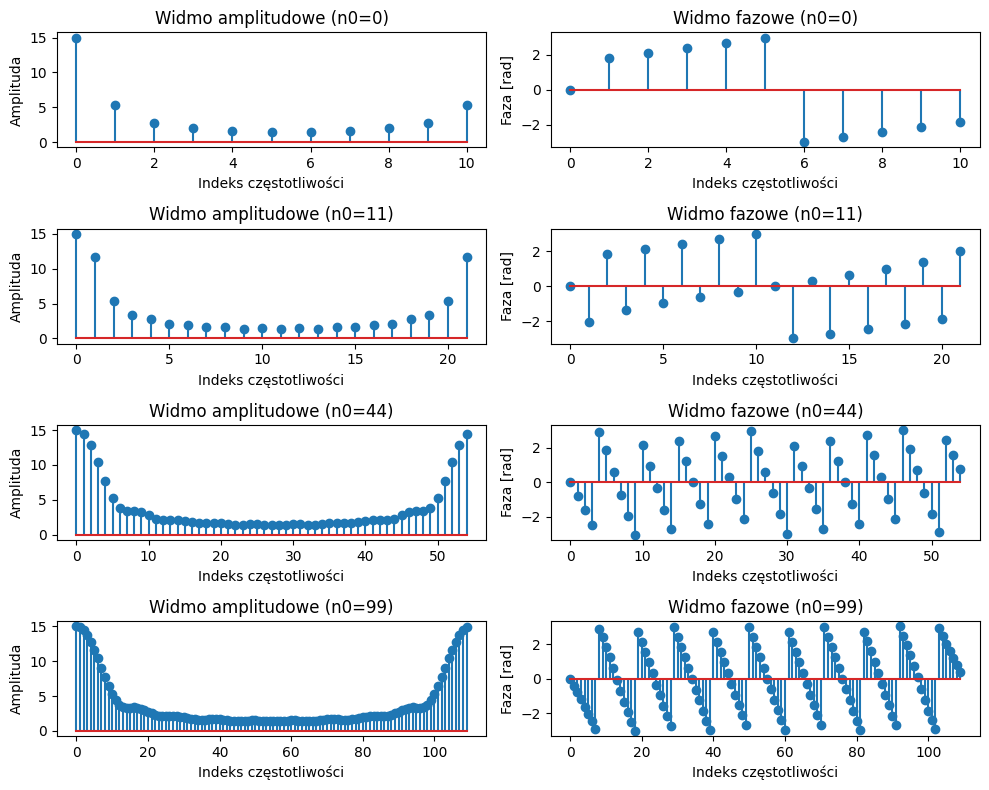

In [15]:
N = 11
A = 3
signal = lambda n: A * (n % N) / N

n = np.arange(N)
N0 = [0, 1 * N, 4 * N, 9 * N]

def calc_spectrum(signal):
    return fft(signal)

def calc_amplitude_spectrum(signal):
    return np.abs(calc_spectrum(signal))


def calc_phase_spectrum(signal):
    angles = np.angle(calc_spectrum(signal))

    zero_angles = abs(angles) < 0.01
    angles *= ~zero_angles

    return angles


fig, axes = plt.subplots(len(N0), 2, figsize=(10, 8))


for i, n0 in enumerate(N0):
    calculated_signal = signal(n)
    for _ in range(n0):
        calculated_signal = np.append(calculated_signal, 0)

    amplitude_spectrum = calc_amplitude_spectrum(calculated_signal)
    phase_spectrum = calc_phase_spectrum(calculated_signal)


    axes[i, 0].stem(amplitude_spectrum)
    axes[i, 0].set_title(f"Widmo amplitudowe (n0={n0})")
    axes[i, 0].set_xlabel("Indeks częstotliwości")
    axes[i, 0].set_ylabel("Amplituda")

    axes[i, 1].stem(phase_spectrum)
    axes[i, 1].set_title(f"Widmo fazowe (n0={n0})")
    axes[i, 1].set_xlabel("Indeks częstotliwości")
    axes[i, 1].set_ylabel("Faza [rad]")

plt.tight_layout()
plt.show()

**Wniosek:** Dopełnienie zerami poprawia rozdzielczość widma, ale nie wpływa na zmianę charakterystyki częstotliwościowej. Poprawa rozdzielczości może ukazać odmienny kształt wykresu, co widać po widmach fazowych. Początkowo zagęszczenie słupków na wykresie było małe, co w połączeniu z funkcją modulo, a zatem pewną okresowością, może nie ukazywać pełni wykresu.

# Zadanie 4

Dany jest sygnał rzeczywisty 𝑠(𝑡) = 𝐴1 𝑠𝑖𝑛(2𝜋𝑓1𝑡) + 𝐴2 𝑠𝑖𝑛(2𝜋𝑓2𝑡) + 𝐴3 𝑠𝑖𝑛(2𝜋𝑓3𝑡) , gdzie 𝐴1 =
0.3 , 𝑓1 = 5000 Hz, 𝐴2 = 0.4 , 𝑓2 = 6000 Hz, 𝐴3 = 0.5 , 𝑓3 = 11000 Hz. Przy założeniu, że
częstotliwość próbkowania wynosi 𝑓𝑠 = 48000 Hz, a liczba próbek sygnału wynosi 𝑁1 = 2048 ,
przedstawić wykres widmowej gęstości mocy sygnału spróbkowanego. Czy dla podanej liczby próbek
mamy do czynienia ze zjawiskiem przecieku widma? Czy sytuacja uległaby zmianie dla liczby próbek
𝑁2 = (3/2) * 𝑁1? Odpowiedź uzasadnić.

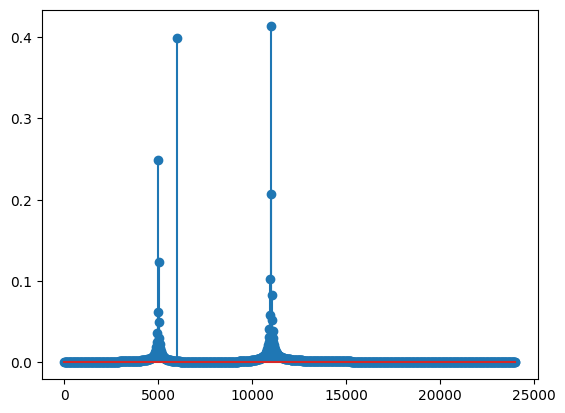

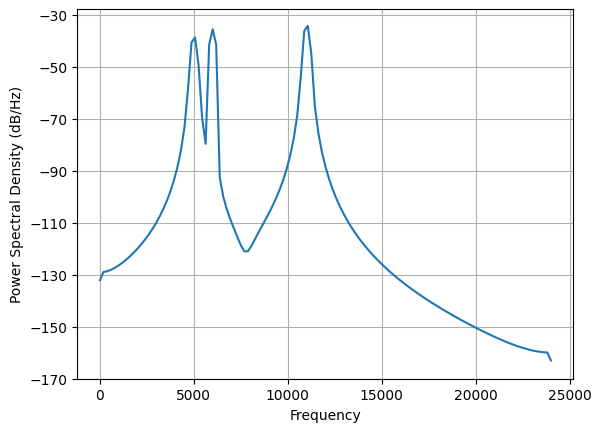

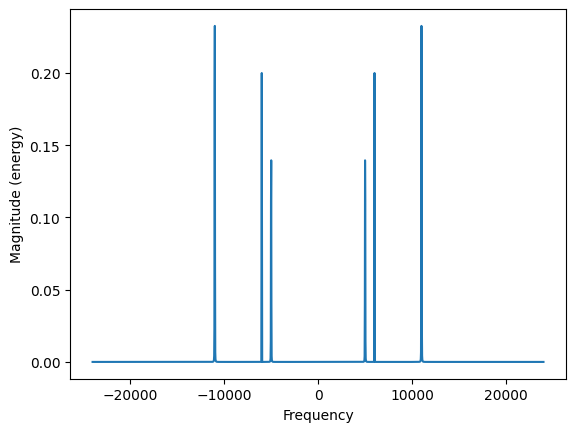

In [ ]:
A = np.array([0.3, 0.4, 0.5])
f = np.array([5000, 6000, 11000])

fs = 48000

N1 = 2048
N2 = int((1.5)*N1)

s_part = lambda ampl, freq, t: ampl* np.sin(2*np.pi * t * freq)
signal = lambda t: np.sum([s_part(A[i], f[i], t) for i in range(3)])

def calculate_magnitude(sig):
    value = [2*np.abs(val)/len(sig) for val in np.fft.rfft(sig)]
    value[0] /= 2
    return value

def signal_desc(sig):
    values = calculate_magnitude(sig)
    delta_f = fs / len(sig)
    plt.stem([i*delta_f for i in range(len(values))], values)
    plt.show()
    plt.psd(sig, Fs=fs)
    plt.show()
    plt.magnitude_spectrum(sig, Fs=fs, sides='twosided')
    plt.show()

signal_desc([signal(n/fs) for n in range(N1)])

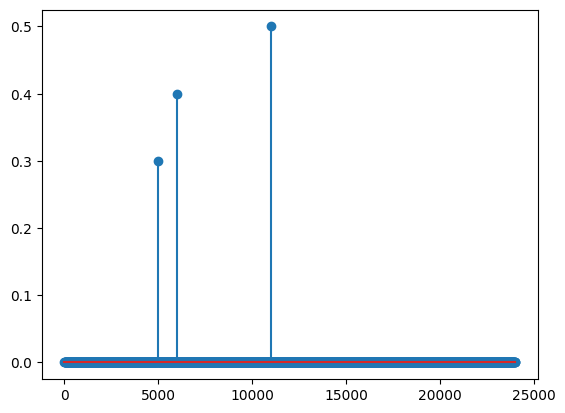

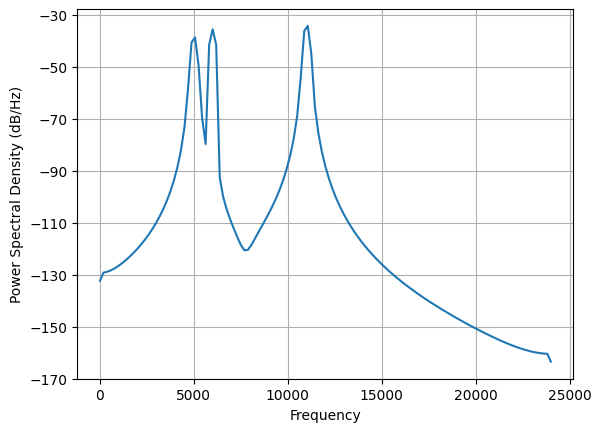

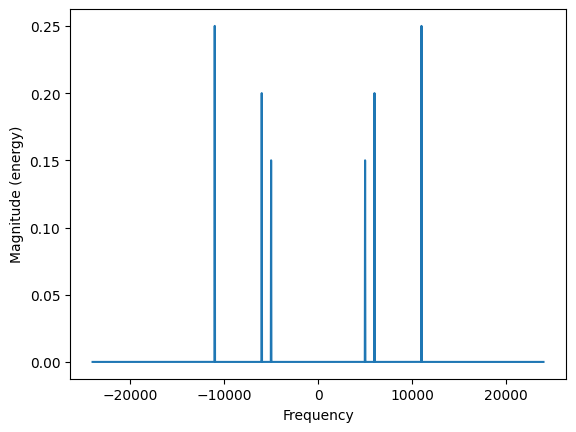

In [17]:
signal_desc([signal(n/fs) for n in range(N2)])

**Dodatkowe obliczenia**

window = 48.0


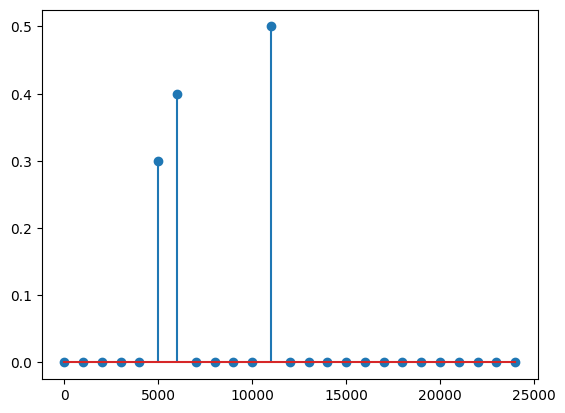

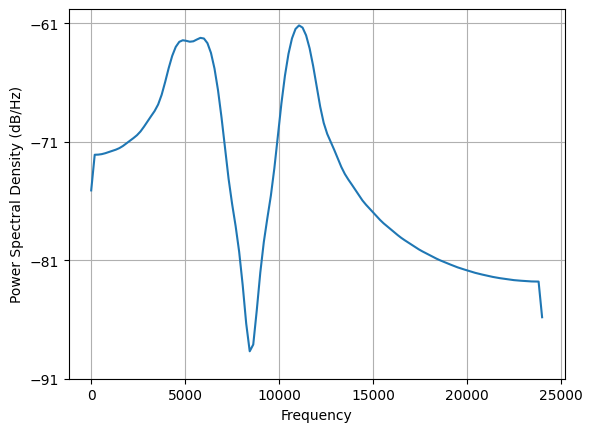

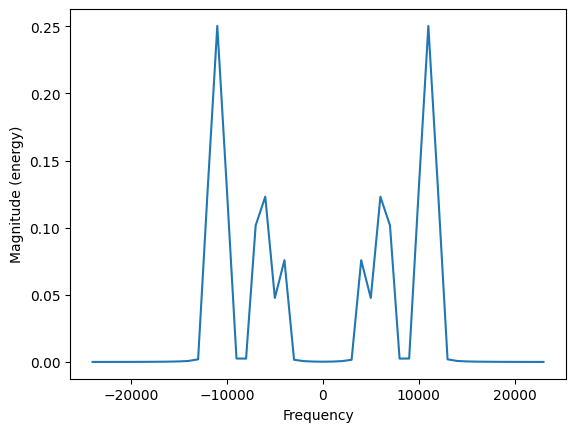

In [18]:
frequency = np.gcd.reduce([f[0], f[1], f[2]])
window = fs / frequency
print('window =', window)
signal_desc([signal(n/fs) for n in range(int(window))])

**Czy dla podanej liczby próbek mamy do czynienia ze zjawiskiem przecieku widma?**  
Tak, moc z 3 prążków "rozlewa" się na inne częstotliwości.

**Czy sytuacja uległaby zmianie dla liczby próbek N2 = 3 * N1 / 2?**  
Tak, sytuacja ulega zmianie. Liczba N2 = 3072 jest podzielna przez zmienną window (48) dla danej częstotliwości fs.

**Wnioski**  
Przecieki widma są spowodowane nieciągłością przy zapętleniu okna analizy.
Aby zapobiec przeciekowi widma, należy skończyć próbkowanie w tym samym miejscu okresu sygnału co zaczeliśmy próbkowanie.